In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/gopinath/Desktop/Machine Learning/Kaggle Wine Dataset/winequality_red.csv')

In [3]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

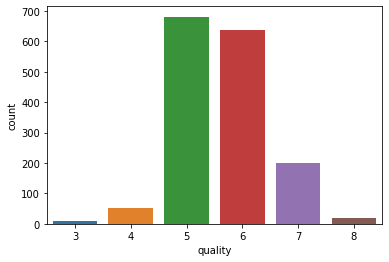

In [7]:
sns.countplot(data['quality'])

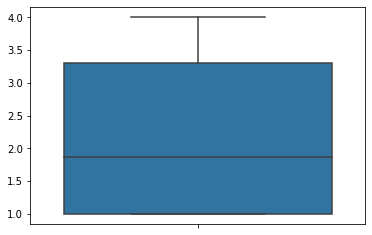

In [8]:
sns.boxplot(x=['density','pH'],data=data,orient='v')

In [9]:
df1=data.copy()

In [10]:
df1.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
bin= (2,5.5,8)
label= ['bad','good']
df1['quality']=pd.cut(x=df1['quality'], bins=bin, labels=label)
df1['quality'].unique()


[bad, good]
Categories (2, object): [bad < good]

In [12]:
label_quality=LabelEncoder()
df1['quality']=label_quality.fit_transform(df1['quality'])

In [13]:
df1.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


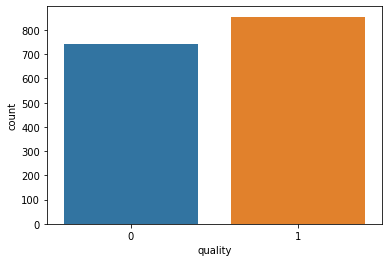

In [14]:
sns.countplot(df1['quality'])

In [15]:
df1['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

# Preprocessing

In [16]:
#Seperate x and y variables

x=df1.drop('quality',axis=1)
y=df1['quality']
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25,random_state=23)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [18]:
#standard_scaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [19]:
x_test

array([[-1.16260691, -0.08328014, -0.68310388, ...,  0.68881831,
         0.50304779,  0.60526747],
       [ 0.36472744, -0.88049172,  1.12781343, ..., -1.75175005,
         2.0303276 , -1.10573599],
       [-0.55167317,  0.1444946 , -1.20050882, ...,  0.36769089,
        -0.96968632, -1.40767777],
       ...,
       [ 1.09784793, -1.50687226,  1.43825639, ..., -2.13710295,
        -0.1515007 ,  1.41044557],
       [ 0.36472744, -1.27909752,  0.61040848, ...,  0.49614186,
         0.33941066,  1.41044557],
       [-0.61276654, -1.05132278,  0.29996552, ...,  0.04656348,
         0.72123062,  0.70591474]])

##Random Forest Classifier

In [20]:
rcf_model=RandomForestClassifier(n_estimators=500)
rcf_model.fit(x_train,y_train)
pred_model=rcf_model.predict(x_test)

In [21]:
##to analyze the result
print(classification_report(pred_model,y_test))
print(confusion_matrix(pred_model,y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       187
           1       0.82      0.83      0.82       213

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

[[148  39]
 [ 37 176]]


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_model,y_test))

0.81


# Support Vector Machines

In [23]:
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)
pred_svm=svm_model.predict(x_test)

In [24]:
print(classification_report(pred_svm,y_test))
print(classification_report(y_test,pred_svm))
print(confusion_matrix(pred_svm,y_test))
print(accuracy_score(pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       193
           1       0.78      0.81      0.79       207

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       185
           1       0.81      0.78      0.79       215

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

[[145  48]
 [ 40 167]]
0.78


NameError: name 'sna' is not defined

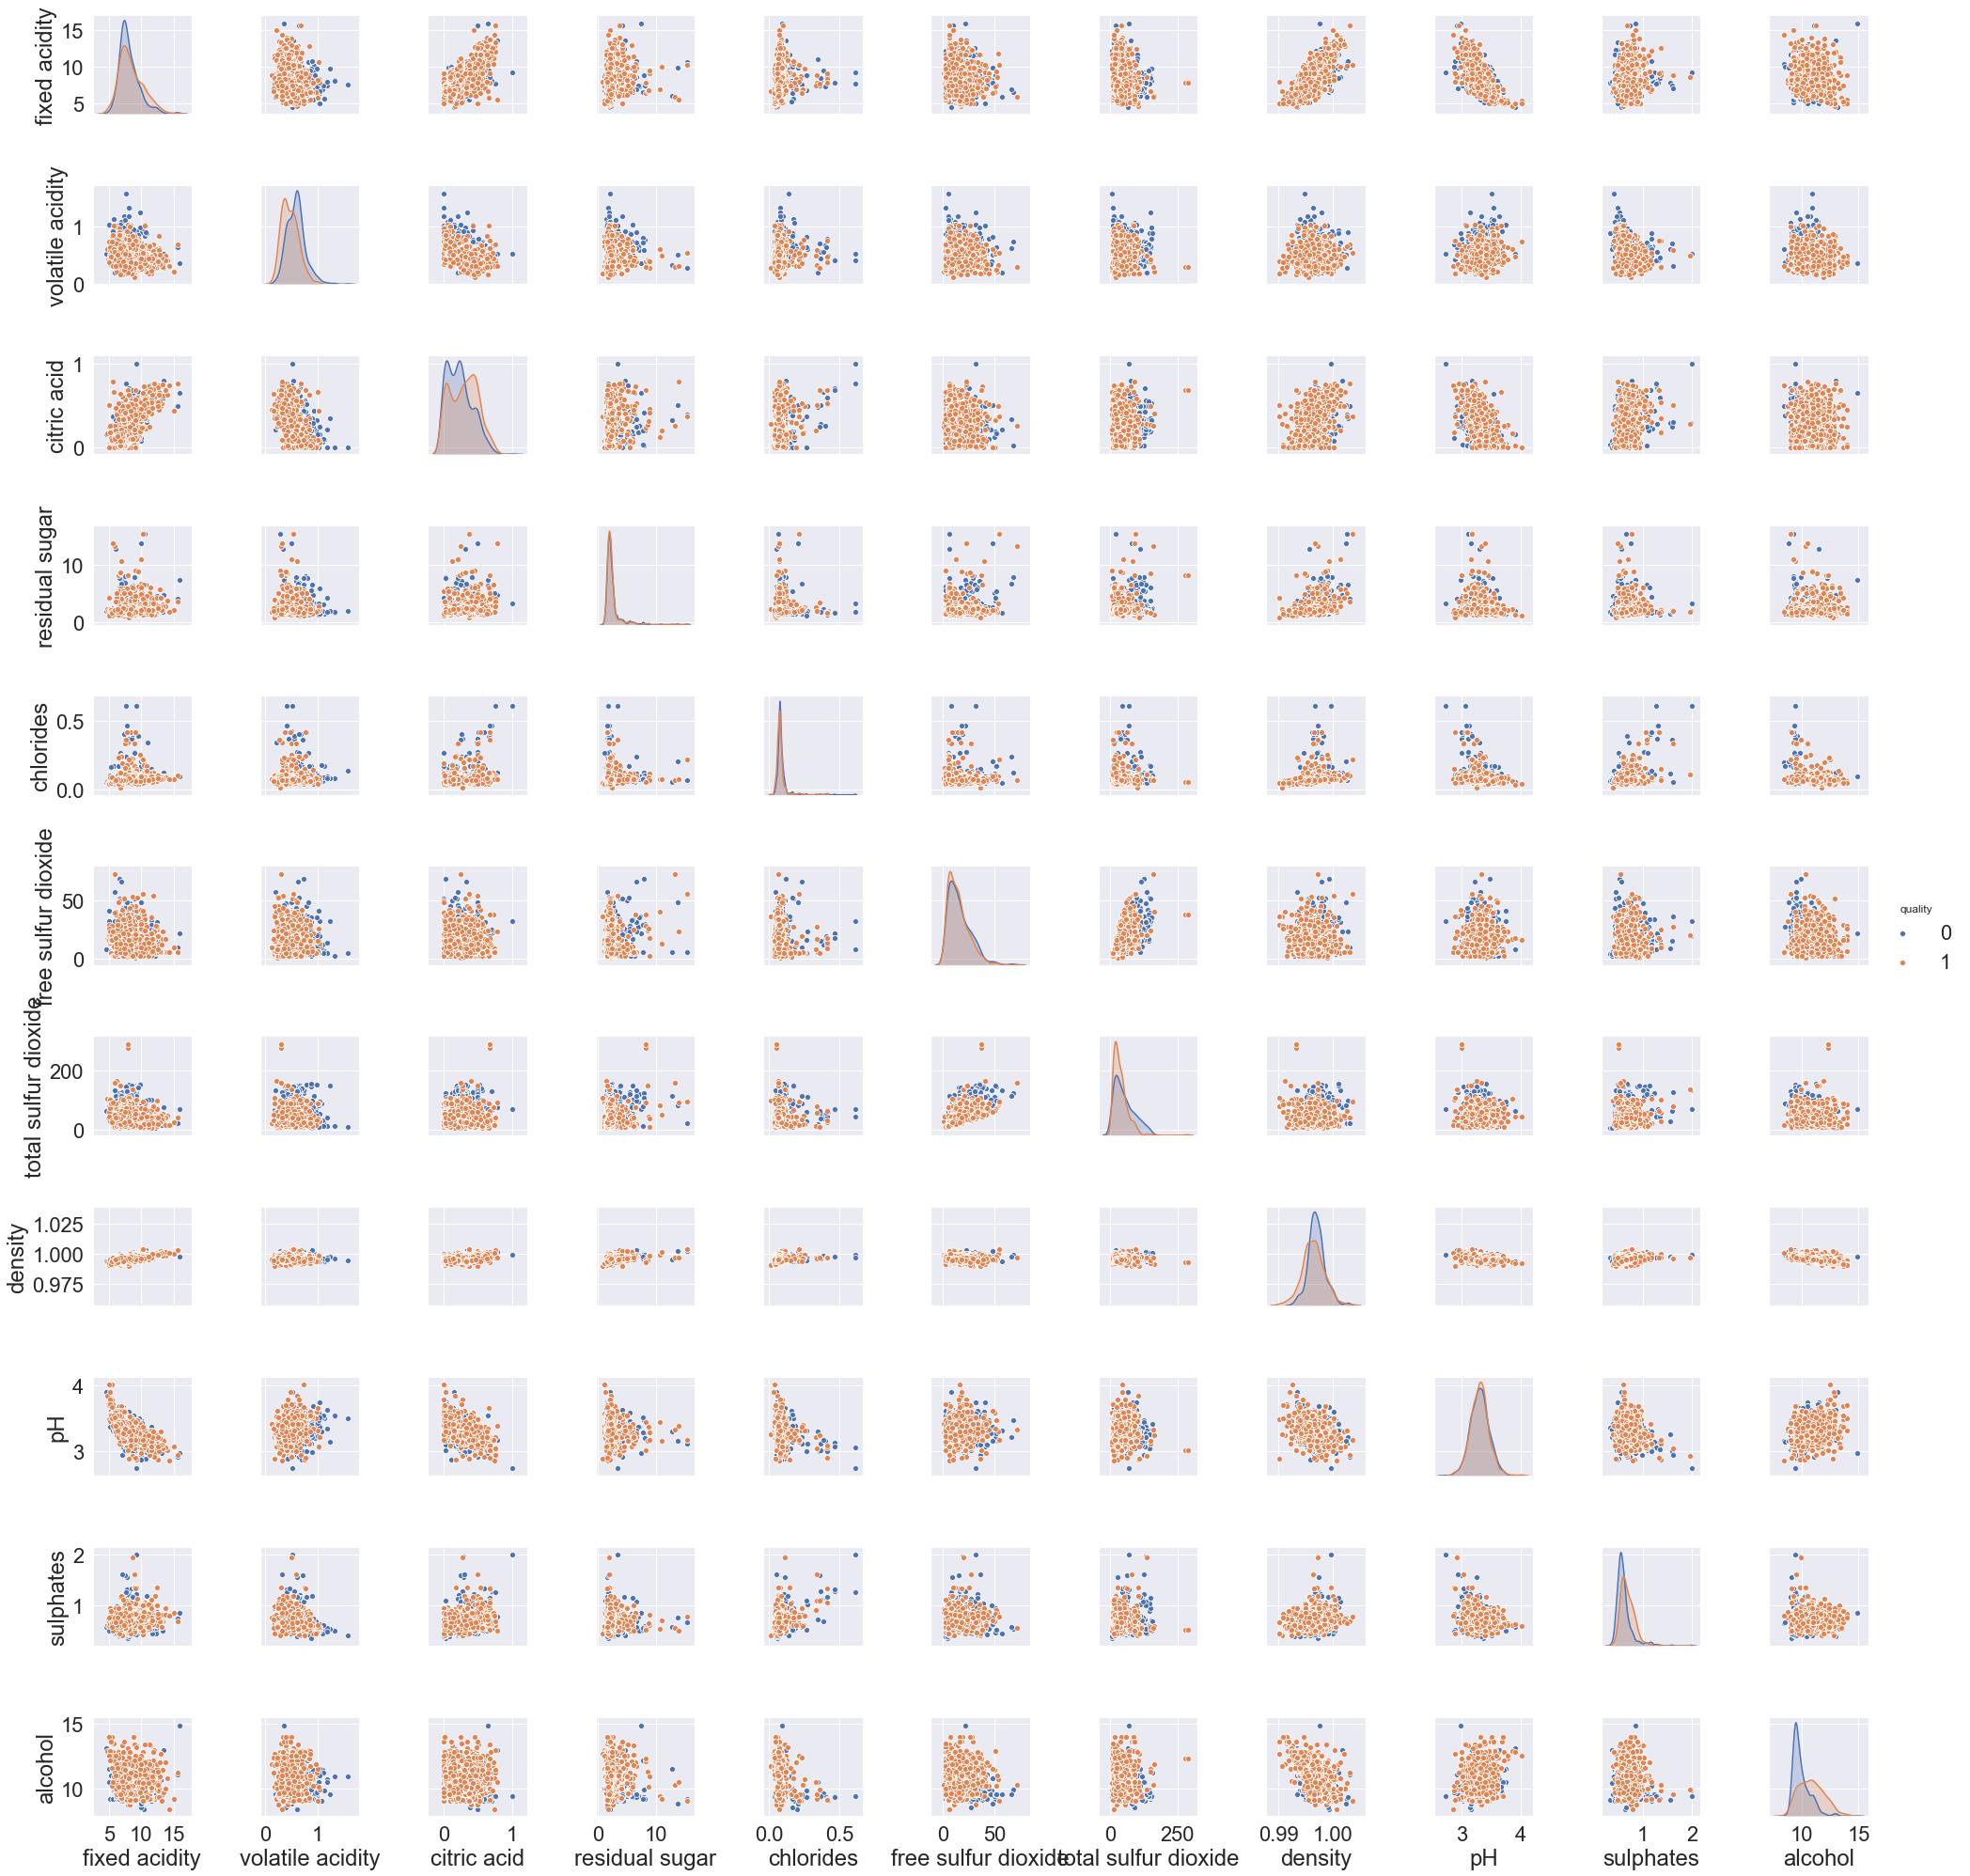

In [56]:
sns.pairplot(df1,hue='quality')
sns.set(font_scale=2)
# its shows that there is no multicollinearity so every feature is taken in to consideration

TypeError: set() takes no keyword arguments

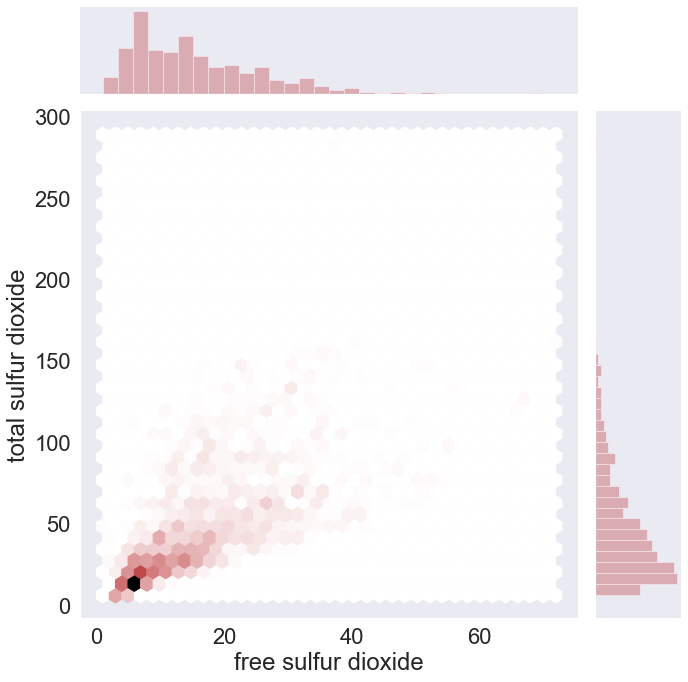

In [84]:
sns.jointplot(x='free sulfur dioxide',y='total sulfur dioxide',kind='hex',color='r',data=df1,height=10)


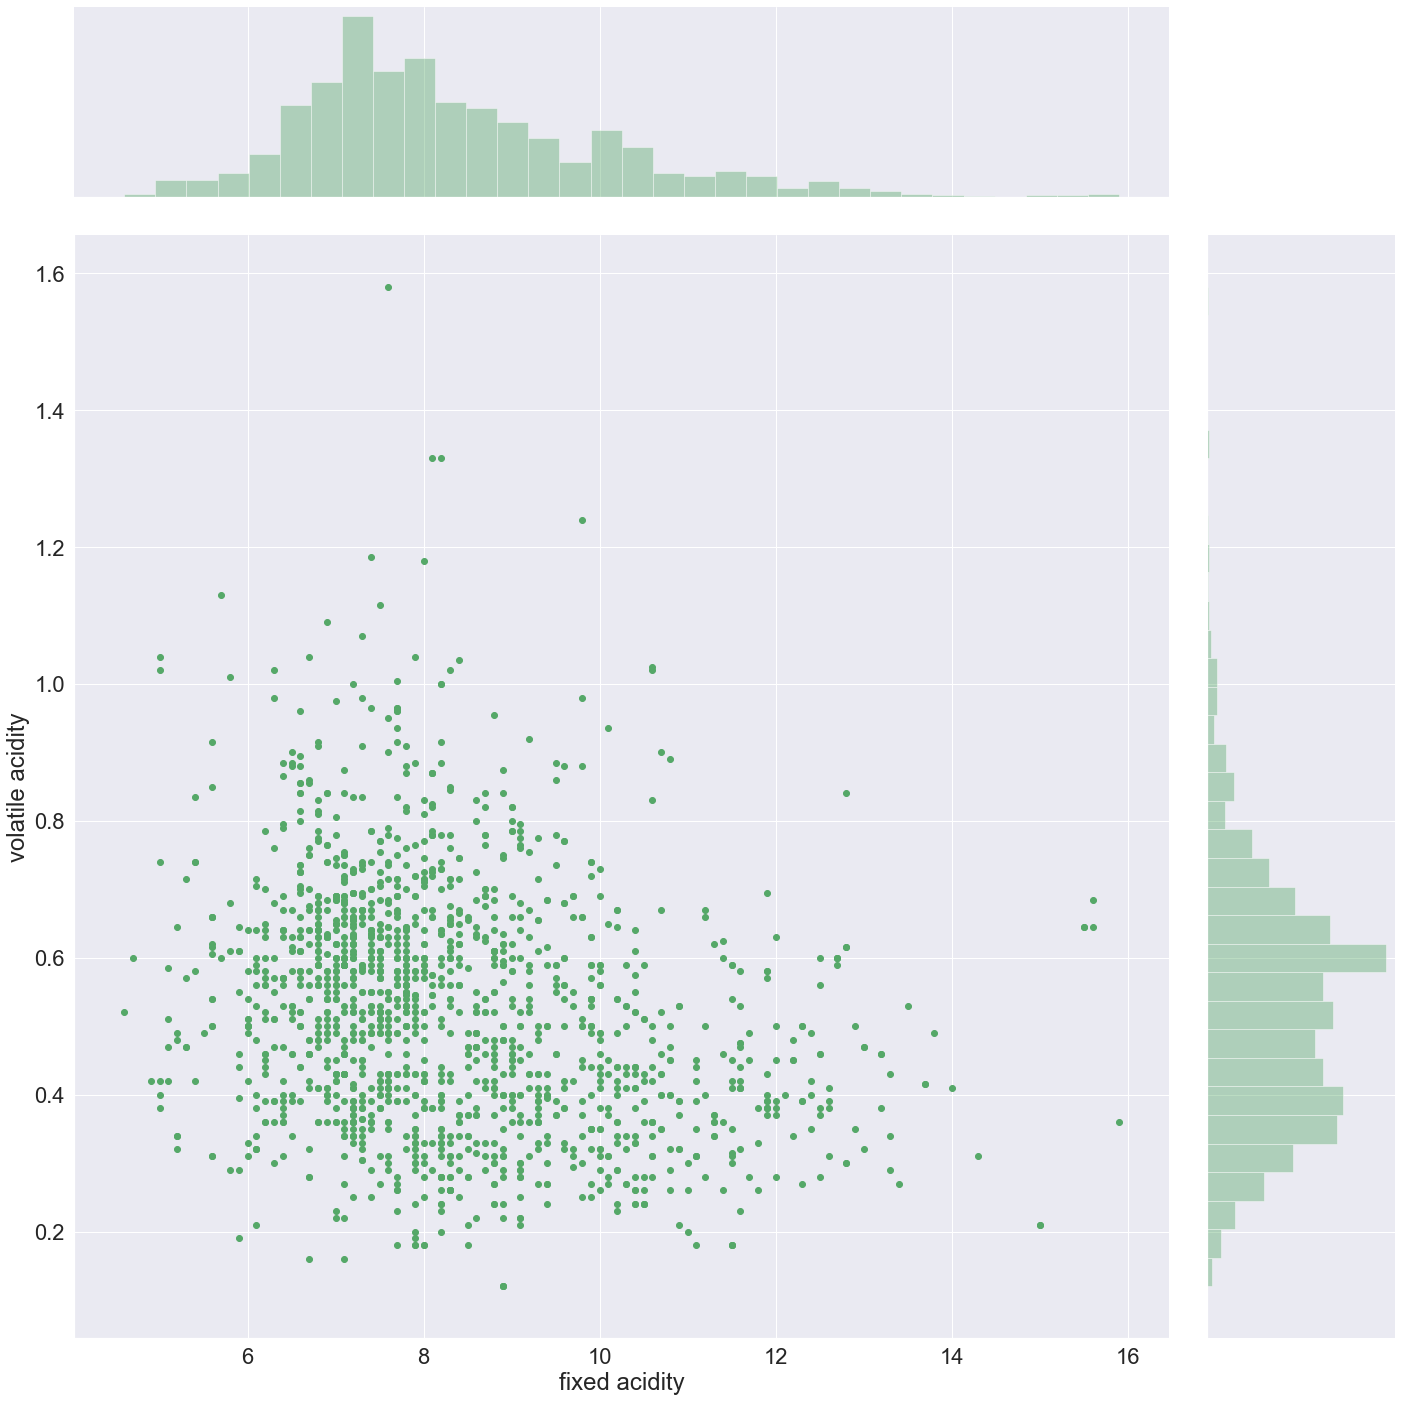

In [55]:
sns.set_style('darkgrid',{"xtick.major.size": 200, "ytick.major.size": 100})
sns.set(font_scale=2)
sns.jointplot(x='fixed acidity',y='volatile acidity',kind='scatter',color='g',height=20,data=df1)

<Figure size 720x720 with 0 Axes>

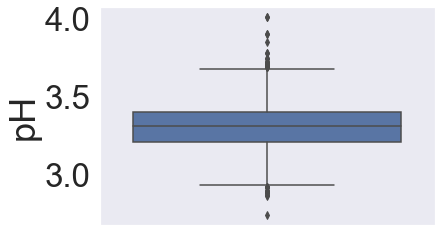

<Figure size 720x720 with 0 Axes>

In [81]:
ax=sns.boxplot(x=df1['pH'],data=df1,orient='vertical',hue='quality')
sns.set(font_scale=2,style='dark')
plt.figure(figsize=(10,10))
